# Network analytics ― week 2

![](images/colors.png)

# Setup

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import numpy as np
import pandas as pd
import networkx as nx

# Agenda

* week 1 wrap-up
     - key concepts
     - case discussion: Soundcloud    
* network theory
    - strong ties and closure mechanisms
    - weak ties and brokerage mechanisms
    - strong and weak ties: friends or foes?
* network models and metrics
    - degree
    - degree distribution
    - paths
    - connectivity
* laboratory

# Week 1 wrap-up

# Key concepts

* Network are made-up of **nodes** and **ties** that are kept together by substantive **relations** 

* In other words, networks are more than graphs $\{V, E\}$  as mathematical objects

# Forms of networks

Networks can take several, non-exclusive forms:

* directed Vs undirected

* weighted Vs unweighted

* one-mode Vs 2-mode (also called bipartite or affiliation networks)

# Network representations

##  One-mode, undirected, unweighted graph

Adjacency matrix

$
A_{i,j} = 
 \begin{pmatrix}
  0 & 1 & 0 & 1 \\
  1 & 0 & 0 & 1 \\
  0 & 0 & 0 & 1 \\
  1 & 1 & 1 & 0 \\
 \end{pmatrix}
 $

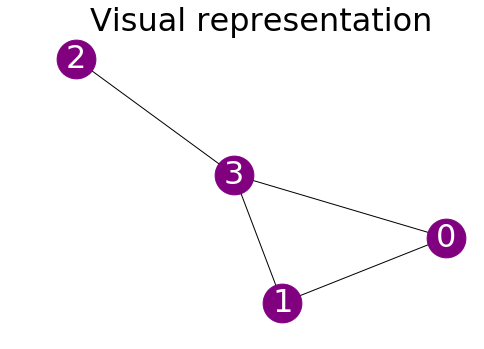

In [18]:
# initialize a new graph object
G = nx.Graph()

# define the set of nodes
node_list = [0, 1, 2, 3]

# populate the graph with nodes
G.add_nodes_from(node_list)

# define the set of edges
edge_list = [(0, 1), (0, 3), (1, 3), (2, 3)]

# populate the graph with edges
G.add_edges_from(edge_list)

# fix the drawing options
options = {'node_color': 'purple',
           'alpha': 1,
           'node_size': 1500,
           'width': 1,
           'with_labels': True,
           'font_size': 32,
           'font_color': 'white'}

# draw the network
nx.draw(G, **options)

# add  title to the network
plt.title('Visual representation', fontsize=32)

# show the plot
plt.show()

# Network representations

##  One-mode, directed, unweighted graph

Adjacency matrix

$
A_{i,j} = 
 \begin{pmatrix}
  0 & 1 & 1 & 0 \\
  1 & 0 & 0 & 0 \\
  1 & 1 & 0 & 1 \\
  1 & 1 & 1 & 0 \\
 \end{pmatrix}
 $

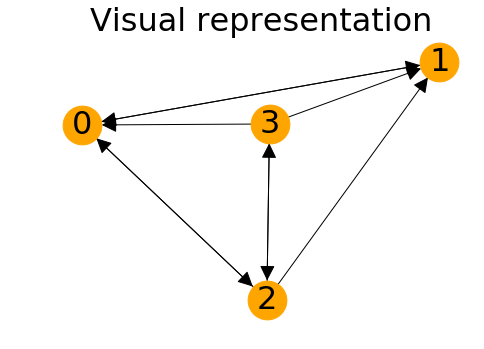

In [19]:
# initialize the graph
G = nx.DiGraph()

# define the set of nodes
node_list = [0, 1, 2, 3]

# populate the graph with nodes
G.add_nodes_from(node_list)

# define the set of edges
edge_list = [(0, 1), (0, 2), (1, 0),
             (2, 0), (2, 1), (2, 3),
             (3, 0), (3, 1), (3, 2)]

# popu;ate the graph with edges
G.add_edges_from(edge_list)

# fix drawing options
options = {'node_color': 'orange',
           'alpha': 1,
           'node_size': 1500,
           'width': 1,
           'arrowstyle': '-|>',
           'arrowsize': 32,
           'with_labels': True,
           'font_size': 32,
           'font_color': 'black'}

# draw the graph
nx.draw(G, **options)

# title
plt.title('Visual representation', fontsize=32)

# show the plot
plt.show()

# Network representations

##  One-mode, undirected, weighted graph

Adjacency matrix

$
A_{i,j} = 
 \begin{pmatrix}
  0 & 3 & 0 & 2 \\
  3 & 0 & 1 & 0 \\
  0 & 1 & 0 & 3 \\
  2 & 0 & 3 & 0 \\
 \end{pmatrix}
 $

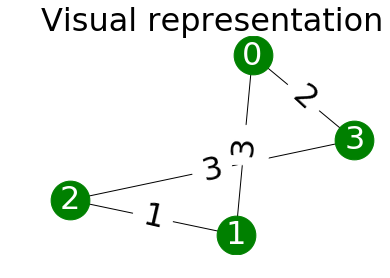

In [20]:
# initialize the graph
G = nx.Graph()

# define the set of nodes
node_list = [0, 1, 2, 3]

# populate the graph with nodes
G.add_nodes_from(node_list)

# define the set of edges
edge_list = [(0, 1, {'w': 3}),
             (0, 3, {'w': 2}),
             (1, 2, {'w': 1}),
             (2, 3, {'w': 3})]

# populate the graph with edges
G.add_edges_from(edge_list)

# define labels 
edge_labels=dict([((u,v,),d['w']) for u,v,d in G.edges(data=True)])

# fix drawing options
options = {'node_color': 'green',
           'alpha': 1,
           'node_size': 1500,
           'width': 1,
           'with_labels': True,
           'font_size': 32,
           'font_color': 'white'}

# fix the position of the nodes to improve readability
pos=nx.spring_layout(G)

# draw the network
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size=32)
nx.draw(G, pos, **options)

# title of the plot
plt.title('Visual representation', fontsize=32)

# show the network
pylab.show()

# Network representations

##  One-mode, directed, weighted graph

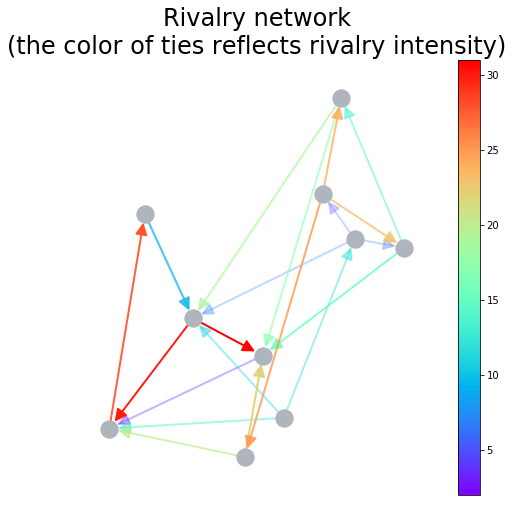

In [10]:
# generate a directed, k-out network
G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)

# fix the position of nodes
pos = nx.layout.spring_layout(G)

# create figure
fig = plt.figure(figsize=(8, 8))

# fix the size of nodes (optional)
# node_sizes = [3 + 10 * i for i in range(len(G))]

# make the color of ties proportional to 'dyadic rivalry'
M = G.number_of_edges()
edge_colors = range(2, M + 2)

# fix transparency to avoid overplotting
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_color='#afb5bc')

# draw arrows
edges = nx.draw_networkx_edges(G, pos, rrowstyle='->',
                               arrowsize=25, edge_color=edge_colors,
                               edge_cmap=plt.cm.rainbow, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.rainbow)
pc.set_array(edge_colors)

plt.colorbar(pc)

plt.title("Rivalry network\n(the color of ties reflects rivalry intensity)", fontsize=24)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# Network representations

##  Two-mode, undirected, unweighted graph

Incidence matrix

$
I_{i,j} = 
 \begin{pmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 1 & 1 & 1 \\
 \end{pmatrix}
 $

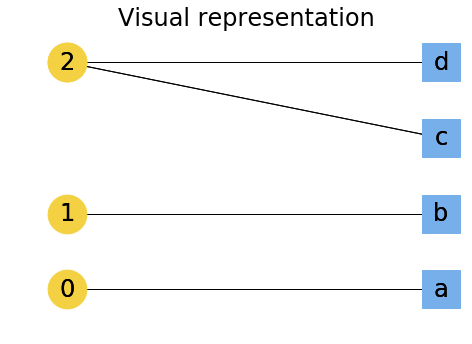

In [14]:
# fake consumption network
df = pd.DataFrame({'user': [0, 1, 2, 2], 'song': ['a', 'b', 'c', 'd']})

# initialize graph
B = nx.Graph()

# add user nodes
B.add_nodes_from(df['user'], bipartite=0)

# add song/product nodes
B.add_nodes_from(df['song'], bipartite=1)
B.add_edges_from([(0, 'a'), (1, 'b'), (2, 'c'), (2, 'd')])

# fix positions for user nodes
pos = {node: [0, i] for i, node in enumerate(df['user'])}

# fix positions for song/product nodes
pos.update({node: [1, i] for i, node in enumerate(df['song'])})

# draw the network - user nodes
nx.draw(B,
        pos,
        nodelist=[0, 1, 2, 2],
        node_color='#f4d142',
        with_labels=True,
        node_size=1500,
        font_size=24)

# draw the network - song/product nodes
nx.draw(B,
        pos,
        nodelist=['a', 'b', 'c', 'd'],
        node_color='#77afea',
        node_shape='s',
        with_labels=True,
        node_size=1500,
        font_size=24)

# title of the plot
plt.title("Visual representation", fontsize=24)

# show the plot
plt.show()

# Business case discussion

How do networks intersect with the **Soundcloud** platform?

![](https://ksassets.timeincuk.net/wp/uploads/sites/55/2016/06/soundcloudlogo110211-1.jpg)

# Business case discussion

![alt text](framework.png)

Source: Santoni, Stark, & Ferriani (2017)

# Week 2 program

# Two fundamental questions about networks 

* How can we use networks as a method to get a closer appreciation of complex phenomena?
* How do networks matter for the organization and functioning of social systems?

# Fields embracing the 'network-as-a-method' approach

## Neuroscience

![](images/nature.jpg)

# Fields embracing the 'network-as-a-method' approach

## Genetics

![](images/genetics.jpg)

# Fields embracing the 'network-as-a-method' approach

## Complex systems

![](images/complexity.gif)

# Fields embracing the network theory perspective

## Economic sociology

How do networks influence the organization and functioning of markets?

# Fields embracing the network theory perspective

## Economic sociology ― Mark Granovetter


![](images/granovetter.jpg)

Granovetter's core messages:

+ The economic action is embedded into social structures
+ Economic and social exchange are note analytically distinct phenomena

# Overview of the sociology of markets readings

## (mandatory reading)

![](images/fourcade.png)

# Example: How do networks notions help us in analysing clusters and industrial districts?

Key features of clusters/[industrial districts](https://en.wikipedia.org/wiki/Industrial_district):
    
* spatial concentration of a large number of firms operating in a same industry
* firm size is small or very small (just a few employees)
* absence of leading, prominent companies
* firms have specialized knowledge
* the value chain develops across the boundaries of a vast number of different organizations

Why do firms belonging to these spatial agglomerations remain so small? Why don't they internalize some activities? Isn't coordination of economic activities too complex/costly to carry-out at the network level? Is there any alternative form of labor division that is more efficient?

# Economic and social interactions go hand-in-hand

Economic fabric

![alt text](http://www.tvprato.it/wp-content/uploads/2014/04/macrolotto-0.png)

Social fabric

![alt text](http://1.bp.blogspot.com/-aZzvMADj9sQ/T6_7GR1z_JI/AAAAAAAAALk/ePTqDT3l_Qc/s1600/Mescolare+carte.jpg)

# Network theories in economic sociology

How do networks bring value to actors and societies?

* Strong ties and closure mechanisms

* Weak ties and brokerage mechanisms

# Overview of network theory

## (suggested reading)

![](images/scott_carrington.jpg)

Relevant chapter: Part I, Chapter 3 (by Borgatti & Lopez-Kidwell)

# Strong ties

Key features of strong ties

* Structural features:
    + Dense, redundant ties develop among actors
    + Frequent, repeated interactions
* Cultural features:
    + Common values and norms
    + Shared cognitive schemas
    + Ties tend to imply emotional involvement
* Associated mechanism:
    + Closure
* Outcomes:
    + Information diffusion
    + Resource access
    + Knowledge transfer
    + Reciprocity
    + Trust
    + Reliability
    + Coordination
    + Tight monitoring

# Strong ties in the economy: Silicon Valley

![](images/silicon_valley.jpg)


# Weak ties

Key features of strong ties

* Structural features:
    + On of few bridging ties linking otherwise disconnected components
    + Dense, redundant ties develop among actors within components
    + Frequent, repeated interactions within components
* Cultural features:
    + Within-component commonality of values and norms
    + Shared cognitive schemas within individual  components
    + Ties tend to imply emotional involvement within individual components
* Associated mechanism:
    + Brokerage
* Outcomes:
    + Innovation
    + Change
    + Entrepreneurship
    + Knowledge recombination
    + Arbitrage
    + Political behavior

# Weak ties in the economy: White truffles (my father's business)

* Luxury good (price ~ £ 6,000 per Kilogram)
* Informal market
* Very dense cluster of truffle hunters who are disconnected from elite chefs and consumers

![](images/white_truffles.jpg)

# Structural folds: Combining strong and weak ties

![](game_changer.png)

# Network metrics and models

# Degree

* The degree of a node, denoted as $k_{i}$ is the count of ties involving the node.

* In the context of directed networks, we distinguish among:
    - indegree, i.e. the count of ties node $i$ receives
    - outdegree, i.e. the count of ties node $i$ sends

# Average degree

$
\langle k \rangle = \frac{1}{N} \sum_{i = 1}^{N}k_{i}
$

# Degree distribution

Given:

$
\sum_{k=1}^{\infty}p_k = 1
$

The degree distribution of a graph is:

$
p_k = \frac{N_{k}}{N}
$

![](images/degree_distribution.jpg)

Source: Barabasi (2016)

![](images/degree_distribution_1.jpg)

Source: Barabasi (2016)

# Paths and distances



* A path between nodes is an ordered list of n links P = {(i0, i1), (i1, i2), (i2, i3), ... ,(in-1, in)}. The length of this path is n. The path shown in orange in (a) follows the route 1→2→5→7→4→6, hence its length is n = 5.
* The shortest paths between nodes 1 and 7, or the distance d17, correspond to the path with the fewest number of links that connect nodes 1 to 7. There can be multiple paths of the same length, as illustrated by the two paths shown in orange and grey. The network diameter is the largest distance in the network, being dmax = 3 here.

![](http://networksciencebook.com/images/ch-02/figure-2-12.jpg)

Source: Barabasi (2016)

# Average path length

The average path length, denoted by $\langle d \rangle$, is the average distance between all pairs of nodes in the network. For a directed network of N nodes, $\langle d \rangle$ is:

$
d = \frac{1}{N * (N - 1)} \sum_{i, j = 1, N; i \neq j} d_{i, j}
$

# Connectedness


* A small network consisting of two disconnected components. Indeed, there is a path between any pair of nodes in the (1,2,3) component, as well in the (4,5,6,7) component. However, there are no paths between nodes that belong to the different components.
* The right panel shows the adjacently matrix of the network. If the network has disconnected components, the adjacency matrix can be rearranged into a block diagonal form, such that all nonzero elements of the matrix are contained in square blocks along the diagonal of the matrix and all other elements are zero.
* The addition of a single link, called a bridge, shown in grey, turns a disconnected network into a single connected component. Now there is a path between every pair of nodes in the network. Consequently the adjacency matrix cannot be written in a block diagonal form.


![](images/connectedness.jpg)

Source: Barabasi (2016)

# Clustering

$
C_{i} = \frac{2L_{i}}{k_{i} * (k_{i} - 1)}
$

 where Li represents the number of links between the ki neighbors of node i. Note that Ci is between 0 and 1 (Image 2.16a):

* Ci = 0 if none of the neighbors of node i link to each other
* Ci = 1 if the neighbors of node i form a complete graph, i.e. they all link to each other
* Ci is the probability that two neighbors of a node link to each other. Consequently C = 0.5 implies that there is a 50% chance that two neighbors of a node are linked


![](images/clustering.jpg)

Source: Barabasi (2016)

# Cookbooks

* Cookbook 1: managing network data
* Cookbook 2: manipulating 2-mode networks with Nx
* Cookbook 3: computing degree distribution
* Cookbook 4: node degree